In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# import datasets
df = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')

In [3]:
# new dataframe
df['TotalSF'] = df['GrLivArea'] + df['TotalBsmtSF']
df_reg = df[['TotalSF','YearRemodAdd','GarageArea','FullBath']]
df_reg = add_constant(df_reg)
df_reg.head(5)

,const,TotalSF,YearRemodAdd,GarageArea,FullBath
0,1.0,2566,2003,548,2
1,1.0,2524,1976,460,2
2,1.0,2706,2002,608,2
3,1.0,2473,1970,642,1
4,1.0,3343,2000,836,2


In [4]:
# check multicollinearity
for index,col in enumerate(df_reg.columns):
    if col == 'const': continue
    print(f'{col}: {variance_inflation_factor(df_reg.values, index)}')

TotalSF: 1.8412057624783007
YearRemodAdd: 1.3119815681283826
GarageArea: 1.5420442578519384
FullBath: 1.6648989865616222


In [117]:
df['LogSalePrice'] = np.log(df['SalePrice'])
y = np.array(df['LogSalePrice']).reshape(-1, 1)

reg = LinearRegression()
poly = PolynomialFeatures(3)

In [118]:
df_reg = df[['TotalSF','FullBath','LotFrontage']].fillna(0)
df_reg = add_constant(df_reg)

for index,col in enumerate(df_reg.columns):
    if col == 'const': continue
    print(f'{col}: {variance_inflation_factor(df_reg.values, index)}')

TotalSF: 1.5868682607348852
FullBath: 1.495035754115986
LotFrontage: 1.0789781844452568


In [119]:
#df_reg.drop(['const'],axis=1)
y = df['SalePrice']
x_ = poly.fit_transform(df_reg)

reg.fit(x_, y)
print("r^2: %.3f" % r2_score(reg.predict(x_),y))

r^2: 0.580


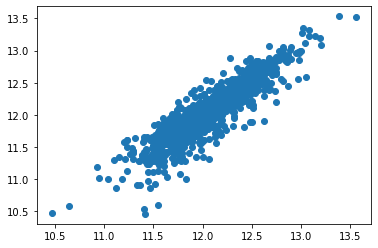

In [113]:
plt.scatter(reg.predict(x_),y)

In [116]:
test['TotalSF'] = test['GrLivArea'] + test['TotalBsmtSF']
#x = test[['TotalSF','GarageArea']]

#x_ = poly.fit_transform(x.fillna(0))

test_vars = test[['TotalSF','YearRemodAdd','FullBath','LotFrontage']].fillna(0)
test_vars = add_constant(test_vars)
test_vars = poly.fit_transform(test_vars)
pred = reg.predict(test_vars)
pred = np.exp(pred)
pred = pred.tolist()
pred = [x[0] for x in pred]
submission = pd.DataFrame({'ID': test['Id'],'SalePrice': pred})
submission

,ID,SalePrice
0,1461,122046.092143
1,1462,147296.127894
2,1463,189307.624059
3,1464,189524.434732
4,1465,168141.017638
...,...,...
1454,2915,104324.554622
1455,2916,104324.554622
1456,2917,152383.410460
1457,2918,128167.292636


In [95]:
submission.to_csv('submission.csv', index=False)